# Shortest path vs length

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

<IPython.core.display.Javascript object>

## Directories and files

In [3]:
outdir = "out/"
plotdir = "plot/"
basefiles = [
    "axis_uniformcritical2distances1-100paths1000iterations4000",
    "axis_uniformcritical8distances1-100paths1000iterations4000",
    "axis_uniformcritical32distances1-100paths1000iterations4000",
    "diag_uniformcritical2distances1-100paths1000iterations4000",
    "diag_uniformcritical8distances1-100paths1000iterations4000",
    "diag_uniformcritical32distances1-100paths1000iterations4000",
]

<IPython.core.display.Javascript object>

## Data

In [4]:
params = [
    pd.read_csv(outdir + basefile + "_params.csv", sep="\t") for basefile in basefiles
]
data = [
    pd.read_csv(
        outdir + basefile + "_vs_distance.csv",
        sep="\t",
        index_col=["distance", "shortest_path_rank"],
    )
    for basefile in basefiles
]

distributions = [param["distribution"][0] for param in params]
means = [param["mean"][0] for param in params]
variances = [param["variance"][0] for param in params]
critical_distances = [param["critical_distance"][0] for param in params]

<IPython.core.display.Javascript object>

## Parameters 

In [5]:
ks = [10, 100, 1000]

<IPython.core.display.Javascript object>

## Style

In [6]:
plt.style.use(["seaborn-paper", plotdir + ".mplstyle"])
set_matplotlib_formats("pdf", "svg")

width = 7.1
height = 0.9 * width

<IPython.core.display.Javascript object>

## Plot

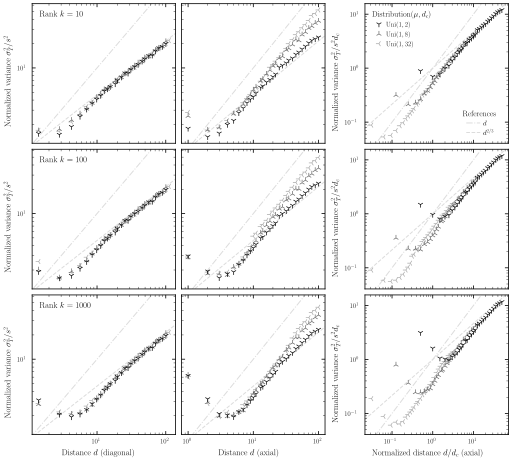

<IPython.core.display.Javascript object>

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(width, height), sharex="col")

colors = ["black", "dimgrey", "darkgrey"]
markers = ["1", "2", "3"]
zorders = [3, 2, 1]

ylim_min1 = ylim_min2 = float("inf")
ylim_max1 = ylim_max2 = 0
for i, (k, row) in enumerate(zip(ks, axs)):
    for j, ax in enumerate(row):
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.tick_params(which="both", direction="in", right=True, top=True)
        if i == 2:
            if j == 0:
                ax.set_xlabel(r"Distance $d$ (diagonal)")
            if j == 1:
                ax.set_xlabel(r"Distance $d$ (axial)")
            if j == 2:
                ax.set_xlabel(r"Normalized distance $d/d_c$ (axial)")
        if j == 0:
            ax.set_ylabel(r"Normalized variance $\sigma_T^2/s^2$")
            ax.text(
                0.05,
                0.95,
                f"Rank $k={k}$",
                transform=ax.transAxes,
                verticalalignment="top",
                fontsize=8.5,
            )
        if j == 1:
            ax.set_yticklabels([])
        if j == 2:
            ax.set_ylabel(r"Normalized variance $\sigma_T^2/s^2d_c$")
        for m in range(3):
            n = m + (3 if j == 0 else 0)
            style = {
                "zorder": zorders[m],
                "color": colors[m],
                "linewidth": 0,
                "marker": markers[m],
                "markersize": 6,
                "markeredgewidth": 0.7,
            }
            x, y = data[n].xs(k, level=1)[
                "cost_variance"
            ].reset_index().to_numpy().transpose() / (
                critical_distances[n] if j == 2 else 1
            )
            ax.plot(
                x * (np.sqrt(2) if j == 0 else 1),
                y / variances[n],
                **style,
                label=r"{}$({},{})$".format(
                    distributions[n][:3].capitalize(), 1, critical_distances[n]
                ),
            )
        xlim = ax.get_xlim()
        if j == 2:
            ylim_min2 = min(ylim_min2, ax.get_ylim()[0])
            ylim_max2 = max(ylim_max2, ax.get_ylim()[1])
        else:
            ylim_min1 = min(ylim_min1, ax.get_ylim()[0])
            ylim_max1 = max(ylim_max1, ax.get_ylim()[1])
        aux_line = np.array([1e-10, 1e10])
        style = {"zorder": 0, "color": "gainsboro", "linewidth": 1}
        (line1,) = ax.plot(aux_line, aux_line, "-.", **style)
        (line2,) = ax.plot(aux_line, aux_line ** (2 / 3), "--", **style)
        ax.set_xlim(xlim)
        if i == 0 and j == 2:
            legend = ax.legend(title=f"Distribution$(\mu,d_c)$", ncol=1)
            legend._legend_box.align = "left"
            legend2 = ax.legend(
                [line1, line2],
                [r"$d$", r"$d^{2/3}$"],
                title="References",
                loc="lower right",
                handlelength=2,
                handletextpad=0.4,
            )
            ax.add_artist(legend)

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        if j == 2:
            ax.set_ylim((ylim_min2, ylim_max2))
        else:
            ax.set_ylim((ylim_min1, ylim_max1))

fig.savefig(plotdir + "shortest_paths_vs_distance.pdf")